In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#load the data
df = pd.read_csv("Resources/diabetes_data_cleaned.csv")

In [32]:
#split the data
X = df.drop("DiabetesDiagnosis", axis=1)
y = df["DiabetesDiagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#create the model
model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
    )

#fit the model
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#evaluate the model
print(classification_report(y_test, y_pred))

#print the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")


              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139

Accuracy: 0.756


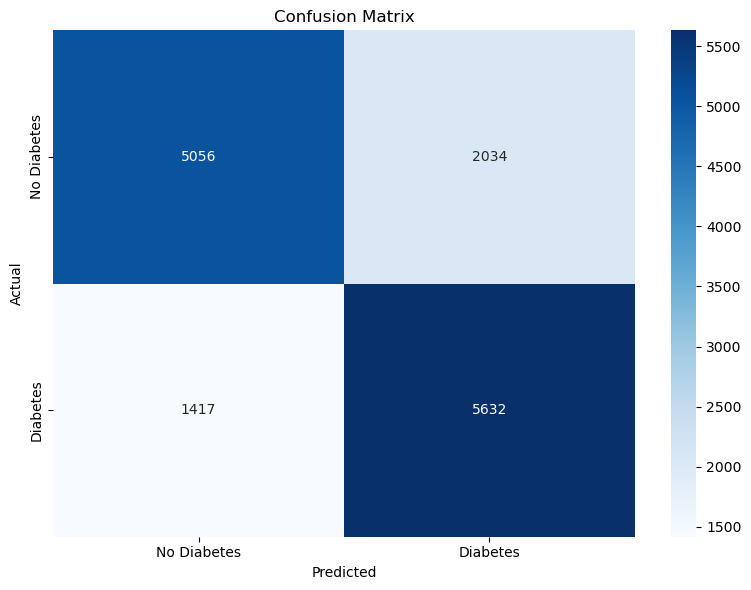

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()